In [ ]:
  # click the run button -> click the link in the result -> go to the new tab & copy the authorization code -> paste in the box below
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries needed here
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [ ]:
# use direct link so no need to download the csv separately
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
df = pd.read_csv(path)

# use info() to check if the dataset contains null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

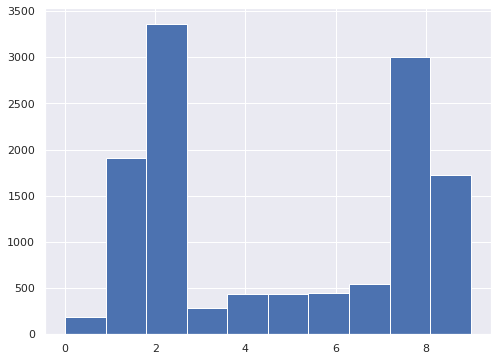

In [ ]:
months = df['Month'].copy()
months.replace({"Feb": 0, "Mar": 1, "May": 2, "June": 3, "Jul": 4, "Aug": 5, "Sep": 6, "Oct": 7, "Nov": 8, "Dec": 9}, inplace=True)
hist = months.hist(bins=10, figsize=(8,6))

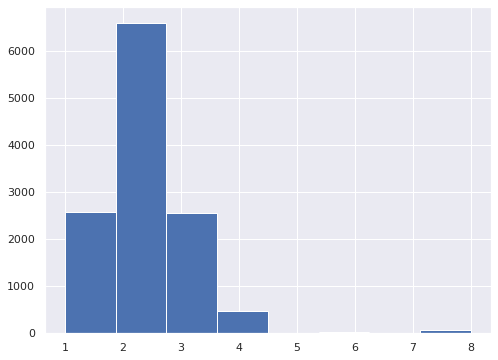

In [ ]:
# looks a little more like a distribution
hist = df['OperatingSystems'].hist(bins=8, figsize=(8,6))

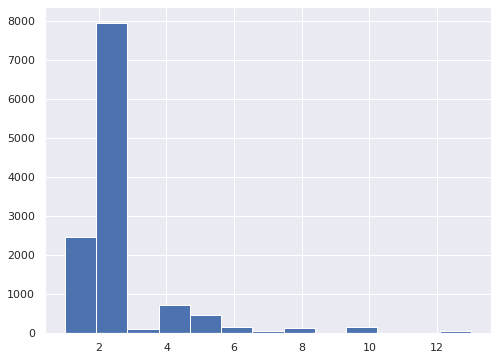

In [ ]:
hist = df['Browser'].hist(bins=13, figsize=(8,6))

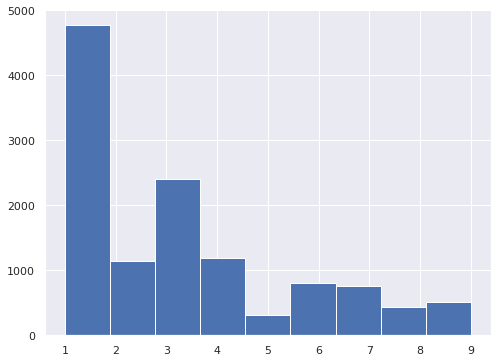

In [ ]:
hist = df['Region'].hist(bins=9, figsize=(8,6))

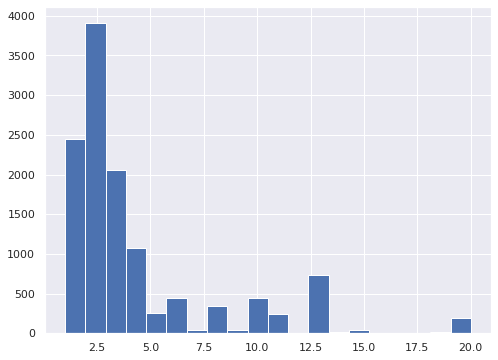

In [ ]:
hist = df['TrafficType'].hist(bins=20, figsize=(8,6))

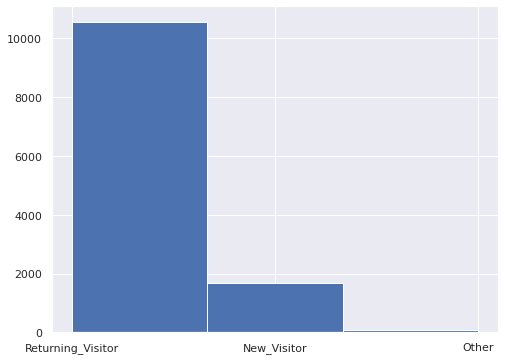

In [ ]:
hist = df['VisitorType'].hist(bins=3, figsize=(8,6))

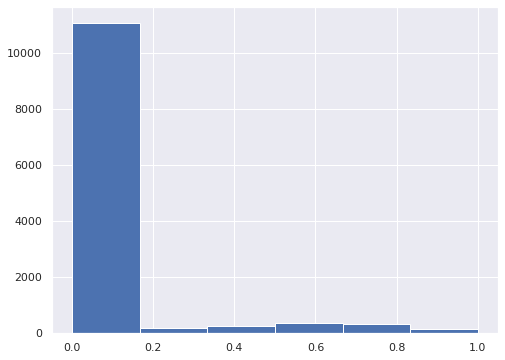

In [ ]:
hist = df['SpecialDay'].hist(bins=6, figsize=(8,6))

In [ ]:
# encode the categorical variables
month = pd.get_dummies(df["Month"], prefix = 'Month')
df = pd.concat([df, month], axis = 1)

# wonder if we need to encode the operating system as it is alreay categorized in numbers
op_sys = pd.get_dummies(df["OperatingSystems"], prefix = 'OperatingSystems')
df = pd.concat([df, op_sys], axis = 1)

# wonder if we need to encode the browser as it is alreay categorized in numbers
browser = pd.get_dummies(df["Browser"], prefix = 'Browser')
df = pd.concat([df, browser], axis = 1)

# wonder if we need to encode the region as it is already categorized in numbers
region = pd.get_dummies(df["Region"], prefix = 'Region')
df = pd.concat([df, region], axis = 1)

# wonder if we need to encode the traffic type as it is alreay categorized in numbers
traffic_type = pd.get_dummies(df["TrafficType"], prefix = 'TrafficType')
df = pd.concat([df, traffic_type], axis = 1)

visitor_type = pd.get_dummies(df["VisitorType"], prefix = 'VisitorType')
df = pd.concat([df, visitor_type], axis = 1)

df["Weekend"] = pd.get_dummies(df["Weekend"], sparse = True)

df["Revenue"] = df["Revenue"].replace({False: 0, True: 1})

# drop repetitive columns
df.drop(columns = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType"], inplace = True)

In [ ]:
# Preprocessing starts here
# normalize the numerical variables
num_cols = ["Administrative", "Administrative_Duration", 
             "Informational", "Informational_Duration", 
             "ProductRelated", "ProductRelated_Duration", 
             "BounceRates", "ExitRates", "PageValues", "SpecialDay"]
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# rearrange the columns' order so that revenue would appear at the very end
revenue = df["Revenue"]
df.drop(columns = ["Revenue"], inplace = True)
df["Revenue"] = revenue
# where false is referred to 0

In [ ]:
# check the dataframe
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# outlier detection

In [ ]:
# try one class svm
# some tries with all columns (wait to be optimized if possible)
from sklearn.svm import OneClassSVM

out_all_cols = df[["Administrative", "Administrative_Duration", 
                   "Informational", "Informational_Duration", 
                   "ProductRelated", "ProductRelated_Duration", 
                   "BounceRates", "ExitRates", "PageValues", "SpecialDay",
                   "Weekend", "Month_Aug", "Month_Dec",	"Month_Feb", "Month_Jul", 
                   "Month_June", "Month_Mar",	"Month_May", "Month_Nov",	"Month_Oct", "Month_Sep",	
                   "OperatingSystems_1", "OperatingSystems_2", "OperatingSystems_3", "OperatingSystems_4",
                   "OperatingSystems_5", "OperatingSystems_6", "OperatingSystems_7", "OperatingSystems_8",
                   "Browser_1", "Browser_2", "Browser_3",	"Browser_4", "Browser_5",	"Browser_6", "Browser_7",
                   "Browser_8",	"Browser_9", "Browser_10", "Browser_11", "Browser_12", "Browser_13", 
                   "Region_1", "Region_2", "Region_3", "Region_4", "Region_5", "Region_6", "Region_7", "Region_8", "Region_9", 
                   "TrafficType_1", "TrafficType_2", "TrafficType_3", "TrafficType_4", "TrafficType_5", "TrafficType_6", "TrafficType_7", 
                   "TrafficType_8", "TrafficType_9", "TrafficType_10", "TrafficType_11", "TrafficType_12", "TrafficType_13", "TrafficType_14", 
                   "TrafficType_15", "TrafficType_16", "TrafficType_17", "TrafficType_18", "TrafficType_19", "TrafficType_20",
                   "VisitorType_New_Visitor", "VisitorType_Other", "VisitorType_Returning_Visitor",	"Revenue"]]

ocsvm = OneClassSVM(kernel = 'rbf', gamma = 0.005, nu = 0.05)
ocsvm.fit(out_all_cols)
outliers_all_svm = out_all_cols[ocsvm.predict(out_all_cols) == -1]
len(outliers_all_svm)

3508

In [ ]:
# some tries with only numerical columns
out_num_cols = df[["Administrative", "Administrative_Duration", 
                   "Informational", "Informational_Duration", 
                   "ProductRelated", "ProductRelated_Duration", 
                   "BounceRates", "ExitRates", "PageValues", "SpecialDay"]]

ocsvm = OneClassSVM(kernel = 'rbf', gamma = 0.005, nu = 0.05)
ocsvm.fit(out_num_cols)
outliers_svm = out_num_cols[ocsvm.predict(out_num_cols) == -1]
len(outliers_svm)

3556

In [ ]:
# try isolation forest
from sklearn.ensemble import IsolationForest

isofor = IsolationForest(n_estimators=300, contamination = 0.05)
isofor = isofor.fit(out_num_cols)

outliers_isofor = out_num_cols[isofor.predict(out_num_cols) == -1]
len(outliers_isofor)

617

In [ ]:
# try Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_jobs = -1)
lof_res = lof.fit_predict(out_num_cols)
outliers_lof = [i for i in range(len(lof_res)) if lof_res[i] == -1]
len(outliers_lof)

960

In [ ]:
#try LOF with all cols
lof_all_res = lof.fit_predict(out_all_cols)
outliers_all_lof = [i for i in range(len(lof_all_res)) if lof_all_res[i] == -1]
len(outliers_all_lof)

805

In [ ]:
# take out the rows with outliers
# use the isolation forest as the lowest outlier detected
outlier_isofor_index = list(outliers_isofor.index.values)
df = df.drop(outlier_isofor_index)
# reset the index after dropping the rows
df = df.reset_index(drop = True)
# the dataset has been modified using the method of isolation forest. 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11708,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11709,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11710,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
11711,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


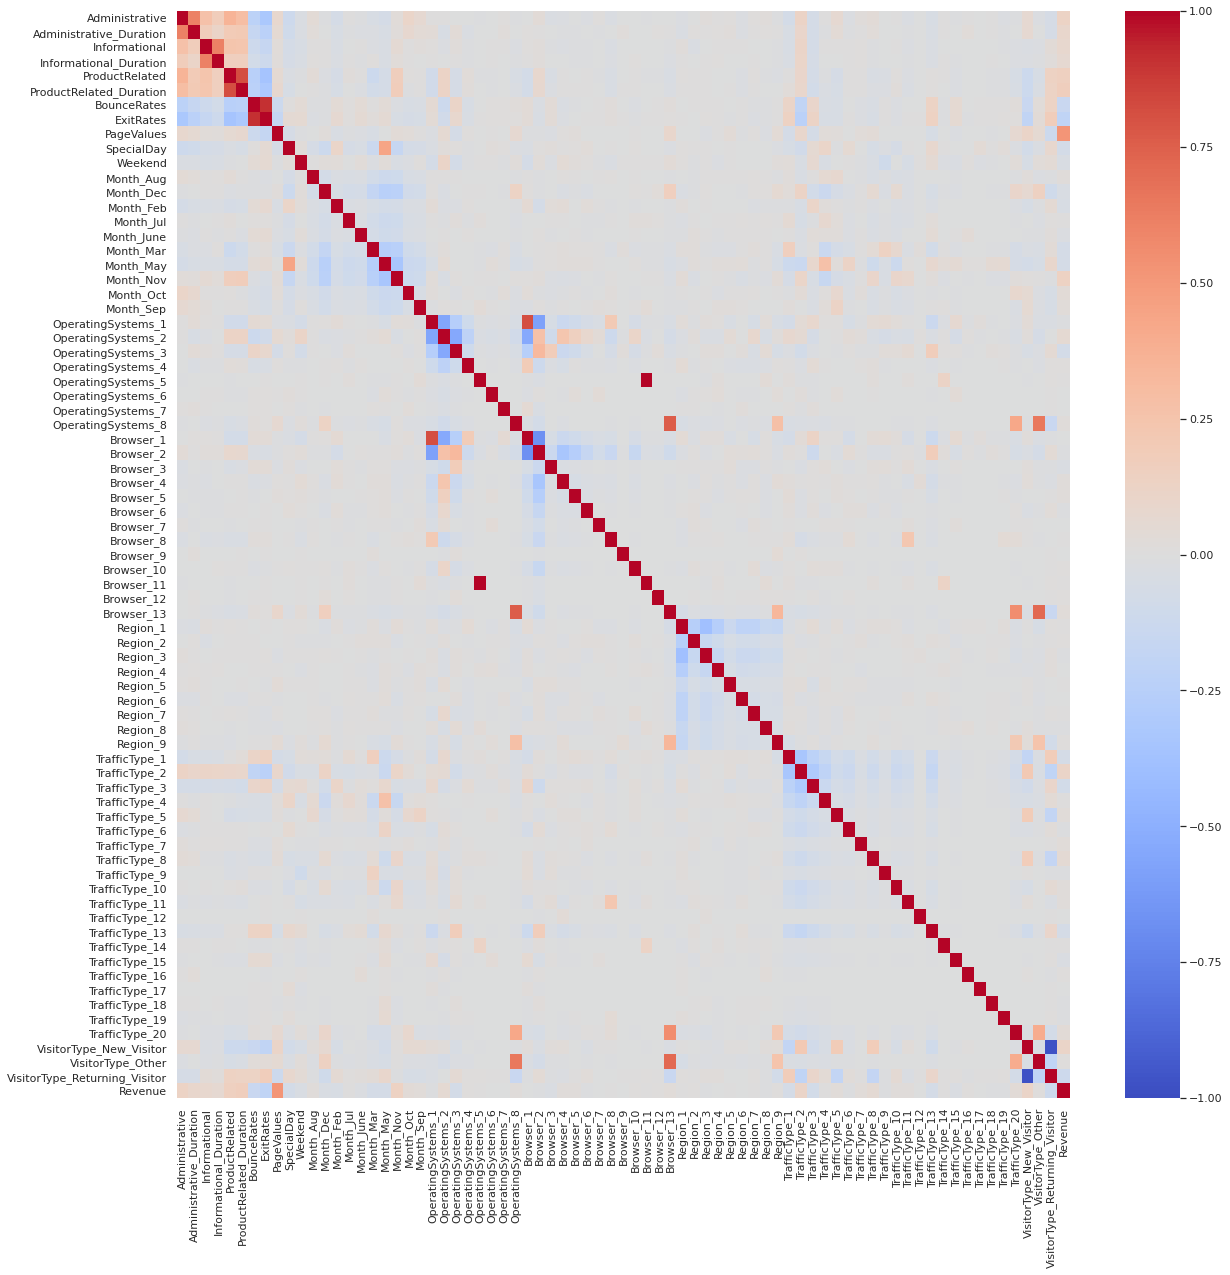

In [ ]:
# remove highly correlated features
# see the correlation using sns' heatmap
import seaborn as sns

# code adapted from the website given by the professor: 
# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(df.corr(), annot = False, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

In [ ]:
# check which values correlate above threshold = 0.5
corr_coeff = df.corr().unstack()
corr_coeff_sort = corr_coeff.sort_values(kind="quicksort", ascending=False)
# num features is 75 so at least first 75 rows will be perfectly correlated
print (corr_coeff_sort[75:100])

Browser_9                Browser_9                  1.000000
Administrative           Administrative             1.000000
ExitRates                BounceRates                0.908559
BounceRates              ExitRates                  0.908559
Browser_1                OperatingSystems_1         0.815670
OperatingSystems_1       Browser_1                  0.815670
ProductRelated_Duration  ProductRelated             0.813848
ProductRelated           ProductRelated_Duration    0.813848
OperatingSystems_8       Browser_13                 0.758746
Browser_13               OperatingSystems_8         0.758746
VisitorType_Other        Browser_13                 0.716726
Browser_13               VisitorType_Other          0.716726
VisitorType_Other        OperatingSystems_8         0.652371
OperatingSystems_8       VisitorType_Other          0.652371
Informational_Duration   Informational              0.617136
Informational            Informational_Duration     0.617136
Administrative_Duration 

In [ ]:
# now check reverse correlation
corr_coeff = df.corr().unstack()
corr_coeff_sort = corr_coeff.sort_values(kind="quicksort", ascending=False)
print (corr_coeff_sort[len(corr_coeff_sort)-20:])

Month_Nov                      Month_May                       -0.340007
Month_May                      Month_Nov                       -0.340007
Browser_4                      Browser_2                       -0.340199
Browser_2                      Browser_4                       -0.340199
ExitRates                      ProductRelated                  -0.351950
ProductRelated                 ExitRates                       -0.351950
Region_3                       Region_1                        -0.388630
Region_1                       Region_3                        -0.388630
Browser_1                      OperatingSystems_2              -0.531791
OperatingSystems_2             Browser_1                       -0.531791
                               OperatingSystems_3              -0.543711
OperatingSystems_3             OperatingSystems_2              -0.543711
OperatingSystems_2             OperatingSystems_1              -0.555467
OperatingSystems_1             OperatingSystems_2  

In [ ]:
# as seen in the matrices above, some variables are highly correlated with each other.
# drop and keep only one in the related variables (correlation coefficient below and above 0.5 and -0.5 respectively)

df.drop(["Administrative", "Informational_Duration", "ProductRelated", "ExitRates",
         "Browser_1", "Browser_11", "Browser_13",
         "OperatingSystems_1", "OperatingSystems_3", "PageValues",
         "VisitorType_Returning_Visitor", "VisitorType_Other"], 
        axis = 1, inplace = True)

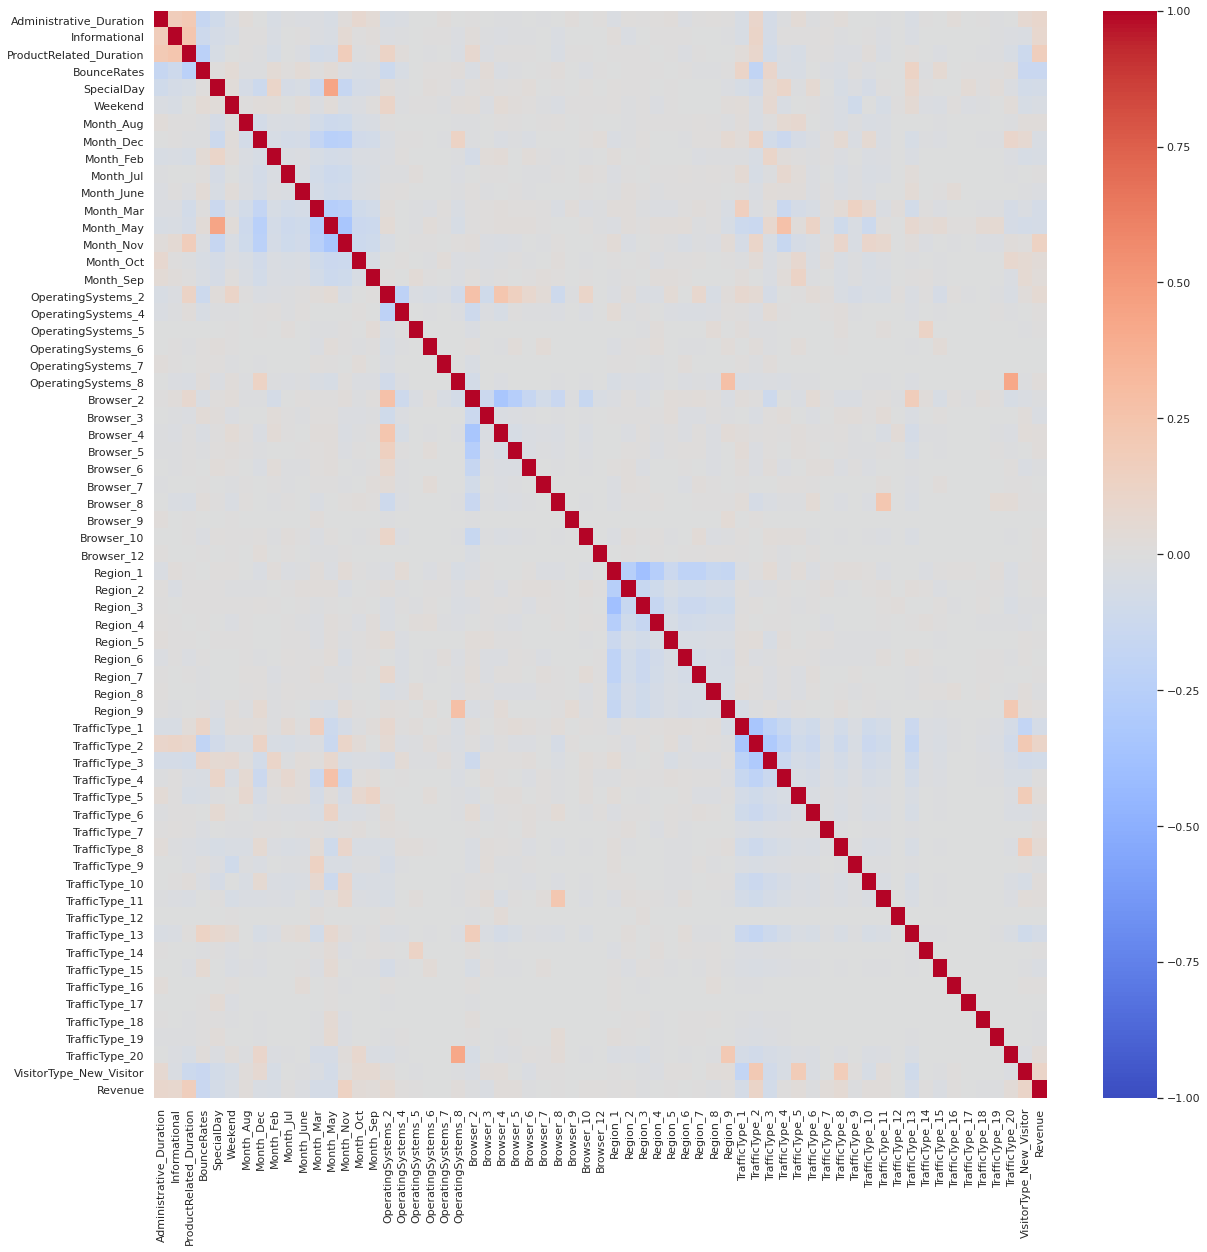

In [ ]:
## double check the correlation
sns.heatmap(df.corr(), annot = False, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
train, test = train_test_split(df, train_size=0.7, random_state=1)
train_X = train.drop('Revenue', axis=1)
train_y = train['Revenue']
test_X = test.drop('Revenue', axis=1)
test_y = test['Revenue']

In [ ]:
print('Training Support: {}'.format(np.unique(train_y, return_counts=True)))
print('Testing Support: {}'.format(np.unique(test_y, return_counts=True)))

Training Support: (array([0, 1]), array([6973, 1226]))
Testing Support: (array([0, 1]), array([2979,  535]))


In [ ]:
# try undersmapling the data because classes are imbalanced
# see https://imbalanced-learn.readthedocs.io/en/stable/introduction.html
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
train_X_under, train_y_under = rus.fit_resample(train_X, train_y)
print(np.unique(train_y, return_counts=True))
print(np.unique(train_y_under, return_counts=True))

(array([0, 1]), array([6973, 1226]))
(array([0, 1]), array([1226, 1226]))


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def getOverSampled(train_X, train_y):
  ros = RandomOverSampler(random_state=2)
  train_X_over, train_y_over = ros.fit_resample(train_X, train_y)
  return train_X_over, train_y_over

def getUnderSampled(train_X, train_y):
  rus = RandomUnderSampler(random_state=2)
  train_X_under, train_y_under = rus.fit_resample(train_X, train_y)
  return train_X_under, train_y_under

In [ ]:
# try oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2)
train_X_over, train_y_over = ros.fit_resample(train_X, train_y)
print(np.unique(train_y, return_counts=True))
print(np.unique(train_y_over, return_counts=True))

(array([0, 1]), array([6973, 1226]))
(array([0, 1]), array([6973, 6973]))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 751 to 235
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative_Duration  8199 non-null   float64
 1   Informational            8199 non-null   float64
 2   ProductRelated_Duration  8199 non-null   float64
 3   BounceRates              8199 non-null   float64
 4   SpecialDay               8199 non-null   float64
 5   Weekend                  8199 non-null   uint8  
 6   Month_Aug                8199 non-null   uint8  
 7   Month_Dec                8199 non-null   uint8  
 8   Month_Feb                8199 non-null   uint8  
 9   Month_Jul                8199 non-null   uint8  
 10  Month_June               8199 non-null   uint8  
 11  Month_Mar                8199 non-null   uint8  
 12  Month_May                8199 non-null   uint8  
 13  Month_Nov                8199 non-null   uint8  
 14  Month_Oct              

In [ ]:
# try keras mlp
def create_keras_mlp(train_X, train_y):
  model = keras.Sequential([layers.Dense(32, activation='sigmoid', input_dim=train_X.shape[1]),
                            layers.Dense(12, activation='sigmoid'),
                            layers.Dense(1, activation='sigmoid')])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='mean_squared_error', 
              metrics=['accuracy'])
  return model

def train_eval_keras_mlp(model, train_X, train_y):
  keras_start_time = time()
  model_res = model.fit(train_X, train_y, batch_size=32, epochs=300)
  keras_train_time = time() - keras_start_time

  # evaluate model on train set and test set
  keras_train_probs = model.predict(train_X)
  keras_train_preds = [0 if keras_train_probs[i] < 0.5 else 1 for i in range(len(keras_train_probs))]
  print('\n\nTrain Precision =', precision_score(train_y, keras_train_preds))
  print('Train Recall =', recall_score(train_y, keras_train_preds))
  keras_test_probs = model.predict(test_X)
  keras_test_preds = [0 if keras_test_probs[i] < 0.5 else 1 for i in range(len(keras_test_probs))]
  print('Test Precision =', precision_score(test_y, keras_test_preds))
  print('Test Recall =', recall_score(test_y, keras_test_preds))
  print('Training Time: {:.2f}s'.format(keras_train_time))

  print(classification_report(test_y, keras_test_preds))
  return keras_test_probs

In [ ]:
# create keras model with input params
def create_keras_mlp(learn_rate=None, input_dim=None):
  model = keras.Sequential([layers.Dense(32, activation='sigmoid', input_dim=input_dim),
                            layers.Dense(12, activation='sigmoid'),
                            layers.Dense(1, activation='sigmoid')])
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learn_rate), loss='mean_squared_error', metrics=['accuracy'])
  return model

# gridsearch for batch size, epochs, and learnign rate
def gd_keras_mlp(model, train_X, train_y):
  param_grid = dict(batch_size=[100, 150, 200, 300], epochs=[150, 200, 250, 300], learn_rate=[0.001, 0.005, 0.01, 0.05])
  grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
  grid_result = grid.fit(train_X, train_y)
  
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

def train_eval_keras_mlp(model, train_X, train_y, batch_size, epochs):
  # train model
  keras_start_time = time()
  model_res = model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs)
  keras_train_time = time() - keras_start_time

  # evaluate model on train set and test set
  keras_train_probs = model.predict(train_X)
  keras_train_preds = [0 if keras_train_probs[i] < 0.5 else 1 for i in range(len(keras_train_probs))]
  print('\n\nTrain Precision =', precision_score(train_y, keras_train_preds))
  print('Train Recall =', recall_score(train_y, keras_train_preds))
  keras_test_probs = model.predict(test_X)
  keras_test_preds = [0 if keras_test_probs[i] < 0.5 else 1 for i in range(len(keras_test_probs))]
  print('Test Precision =', precision_score(test_y, keras_test_preds))
  print('Test Recall =', recall_score(test_y, keras_test_preds))
  print('Training Time: {:.2f}s'.format(keras_train_time))

  # print full classification report
  print('\n\n', classification_report(test_y, keras_test_preds))

# Perform grid search for epochs, batch size, learning rate
model = KerasClassifier(build_fn=create_keras_mlp, input_dim=train_X.shape[1], verbose=0)
gd_keras_mlp(model, train_X, train_y)

In [ ]:
# Run model
model = KerasClassifier(build_fn=create_keras_mlp, learn_rate=0.001, input_dim=train_X.shape[1], verbose=0)
train_eval_keras_mlp(model, train_X, train_y, 300, 150)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Train Precision = 0.4444444444444444
Train Recall = 0.003286770747740345
Test Precision = 0.6666666666666666
Test Recall = 0.007532956685499058
Training Time: 4.59s


               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2983
           1       0.67      0.01      0.01       531

    accuracy                           0.85      3514
   macro avg       0.76      0.50      0.47      3514
weighted avg       0.82      0.85      0.78      3514



In [ ]:
# Train model and evaluate
model = create_keras_mlp(train_X, train_y)
train_eval_keras_mlp(model, train_X, train_y)

Epoch 1/300
257/257 [==============================] - 0s 1ms/step - loss: 0.1325 - accuracy: 0.8355
Epoch 2/300
257/257 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.8516
Epoch 3/300
257/257 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.8516
Epoch 4/300
257/257 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.8517
Epoch 5/300
257/257 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.8516
Epoch 6/300
257/257 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.8516
Epoch 7/300
257/257 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.8516
Epoch 8/300
257/257 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.8516
Epoch 9/300
257/257 [==============================] - 0s 1ms/step - loss: 0.1158 - accuracy: 0.8516
Epoch 10/300
257/257 [==============================] - 0s 1ms/step - loss: 0.1157 - accura

array([[2.5402725e-02],
       [3.8003652e-06],
       [3.6390525e-01],
       ...,
       [4.3038845e-02],
       [4.0696144e-02],
       [4.6355724e-03]], dtype=float32)

In [ ]:
# Train model on oversampled data and evaluate
model = create_keras_mlp(train_X_over, train_y_over)
train_eval_keras_mlp(model, train_X_over, train_y_over)

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_213 (Dense)            (None, 32)                2016      
_________________________________________________________________
dense_214 (Dense)            (None, 12)                396       
_________________________________________________________________
dense_215 (Dense)            (None, 1)                 13        
Total params: 2,425
Trainable params: 2,425
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
77/77 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.5599
Epoch 2/300
77/77 [==============================] - 0s 1ms/step - loss: 0.2292 - accuracy: 0.6380
Epoch 3/300
77/77 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.6478
Epoch 4/300
77/77 [==============================] - 0s 1ms/step - loss: 0.2137

In [ ]:
# Train model on undersampled data and evaluate
model = create_keras_mlp(train_X_under, train_y_under)
train_eval_keras_mlp(model, train_X_under, train_y_under)

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 32)                2016      
_________________________________________________________________
dense_103 (Dense)            (None, 12)                396       
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 13        
Total params: 2,425
Trainable params: 2,425
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
77/77 [==============================] - 0s 1ms/step - loss: 0.2460 - accuracy: 0.5688
Epoch 2/300
77/77 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.6352
Epoch 3/300
77/77 [==============================] - 0s 1ms/step - loss: 0.2176 - accuracy: 0.6600
Epoch 4/300
77/77 [==============================] - 0s 1ms/step - loss: 0.2149

In [ ]:
# cross validation for keras model
from sklearn.model_selection import StratifiedKFold

KFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
cv_scores = []

# Divide entire dataset into X and Y (no train test split)
X = df.drop(columns=['Revenue'])
Y = df['Revenue']

for train, test in KFold.split(X, Y):
  # Create, compile, fit model
  model = keras.Sequential([layers.Dense(32, activation='sigmoid', input_dim=train_X.shape[1]),
                          layers.Dense(12, activation='sigmoid'),
                          layers.Dense(1, activation='sigmoid')])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='mean_squared_error', 
                metrics=['accuracy'])
  model.fit(X.loc[train], Y.loc[train], batch_size=32, epochs=300)
  
  # Evaluate model and append metric scores
  scores = model.evaluate(X.loc[test], Y.loc[test])
  cv_scores.append(scores[1] * 100)

# Print results for each fold of the metric
print ('\n', model.metrics_names[1])
for index, score in enumerate(cv_scores):
  print ('fold', index, ':', score)
print ('mean:', np.mean(cv_scores), 'std:', np.std(cv_scores))

Epoch 1/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1290 - accuracy: 0.8424
Epoch 2/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1198 - accuracy: 0.8513
Epoch 3/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.8513
Epoch 4/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1177 - accuracy: 0.8513
Epoch 5/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.8514
Epoch 6/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.8513
Epoch 7/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.8513
Epoch 8/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.8513
Epoch 9/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.8514
Epoch 10/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1158 - accura

In [ ]:
# try sklearn MLP Classifier
from sklearn.neural_network import MLPClassifier
def create_sklearn_MLP():
  return MLPClassifier(hidden_layer_sizes=(24, 8), activation='logistic', solver='adam', learning_rate_init=0.005, max_iter=300)

def train_eval_sklearn_mlp(clf, train_X, train_y, test_X, test_y):
  mlpc_start_time = time()
  clf.fit(train_X, train_y)
  mlpc_train_time = time() - mlpc_start_time
  mlpc_train_probs = clf.predict(train_X)
  mlpc_train_preds = [0 if mlpc_train_probs[i] < 0.5 else 1 for i in range(len(mlpc_train_probs))]
  print('Train Precision =', precision_score(train_y, mlpc_train_preds))
  print('Train Recall =', recall_score(train_y, mlpc_train_preds))
  mlpc_test_probs = clf.predict(test_X)
  mlpc_test_preds = [0 if mlpc_test_probs[i] < 0.5 else 1 for i in range(len(mlpc_test_probs))]
  print('Test Precision =', precision_score(test_y, mlpc_test_preds))
  print('Test Recall =', recall_score(test_y, mlpc_test_preds))
  print('Training Time: {:.2f}s'.format(mlpc_train_time))
  return mlpc_test_probs

In [ ]:
mlpc_test_probs = train_eval_sklearn_mlp(create_sklearn_MLP(), train_X, train_y, test_X, test_y)

Train Precision = 0.7083333333333334
Train Recall = 0.2935855263157895
Test Precision = 0.3203125
Test Recall = 0.15213358070500926
Training Time: 13.71s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlpc_train_probs = clf.predict(train_X)
mlpc_train_preds = [0 if mlpc_train_probs[i] < 0.5 else 1 for i in range(len(mlpc_train_probs))]
print('Train Precision =', precision_score(train_y, mlpc_train_preds))
print('Train Recall =', recall_score(train_y, mlpc_train_preds))
mlpc_test_probs = clf.predict(test_X)
mlpc_test_preds = [0 if mlpc_test_probs[i] < 0.5 else 1 for i in range(len(mlpc_test_probs))]
print('Test Precision =', precision_score(test_y, mlpc_test_preds))
print('Test Recall =', recall_score(test_y, mlpc_test_preds))
print('Training Time: {:.2f}s'.format(mlpc_train_time))

Train Precision = 0.7278911564625851
Train Recall = 0.3454398708635997
Test Precision = 0.2938775510204082
Test Recall = 0.14342629482071714
Training Time: 13.31s


In [ ]:
print(classification_report(test_y, mlpc_test_preds))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3012
           1       0.29      0.14      0.19       502

    accuracy                           0.83      3514
   macro avg       0.58      0.54      0.55      3514
weighted avg       0.79      0.83      0.80      3514



In [ ]:
# check report when trained on undersampled data
clf.fit(train_X_under, train_y_under)
mlpc_under_test_probs = clf.predict(test_X)
mlpc_under_test_preds = [0 if mlpc_under_test_probs[i] < 0.5 else 1 for i in range(len(mlpc_under_test_probs))]
print(classification_report(test_y, mlpc_under_test_preds))

              precision    recall  f1-score   support

           0       0.90      0.65      0.76      3012
           1       0.21      0.57      0.31       502

    accuracy                           0.64      3514
   macro avg       0.56      0.61      0.53      3514
weighted avg       0.80      0.64      0.69      3514



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# check report when trained on oversampled data
clf.fit(train_X_over, train_y_over)
mlpc_over_test_probs = clf.predict(test_X)
mlpc_over_test_preds = [0 if mlpc_over_test_probs[i] < 0.5 else 1 for i in range(len(mlpc_over_test_probs))]
print(classification_report(test_y, mlpc_over_test_preds))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3012
           1       0.24      0.48      0.32       502

    accuracy                           0.70      3514
   macro avg       0.57      0.61      0.56      3514
weighted avg       0.80      0.70      0.74      3514



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# check cross validation scores for mlpclassifier
cv_scores = cross_val_score(clf, train_X, train_y, scoring='f1_micro', n_jobs=-1)
cv_scores

array([0.79939024, 0.80609756, 0.79573171, 0.79756098, 0.76876144])

In [ ]:
# try SVM classifier from sklearn
from sklearn.svm import SVC
# Look into different parameters. I tried the following to get the best performance so far for ROC curve
def create_svm():
  return SVC(kernel='sigmoid', class_weight='balanced', gamma='auto')

def train_eval_svm(svm_clf, train_X, train_y, test_X, test_y):
  svm_start_time = time()
  svm_clf.fit(train_X, train_y)
  svm_train_time = time() - svm_start_time
  svm_train_probs = svm_clf.predict(train_X)
  svm_train_preds = [0 if svm_train_probs[i] < 0.5 else 1 for i in range(len(svm_train_probs))]
  print('Train Precision =', precision_score(train_y, svm_train_preds))
  print('Train Recall =', recall_score(train_y, svm_train_preds))
  svm_test_probs = svm_clf.predict(test_X)
  print(svm_test_probs)
  svm_test_preds = [0 if svm_test_probs[i] < 0.5 else 1 for i in range(len(svm_test_probs))]
  print('Test Precision =', precision_score(test_y, svm_test_preds))
  print('Test Recall =', recall_score(test_y, svm_test_preds))
  print('Training Time: {:.2f}s'.format(svm_train_time))
  print((classification_report(test_y, svm_test_preds)))
  return svm_test_probs


In [ ]:
svm = create_svm()

In [ ]:
# check cross validation scores for svm
svm_cv_scores = cross_val_score(svm, train_X, train_y, scoring='f1_micro', n_jobs=-1)
svm_cv_scores

array([0.64329268, 0.64573171, 0.6445122 , 0.61036585, 0.59365467])

In [ ]:
train_eval_svm(create_svm(), train_X, train_y, test_X, test_y)

Train Precision = 0.24489795918367346
Train Recall = 0.7006578947368421
[0 0 1 ... 0 0 0]
Test Precision = 0.2315369261477046
Test Recall = 0.6456400742115028
Training Time: 8.11s
              precision    recall  f1-score   support

           0       0.91      0.61      0.73      2975
           1       0.23      0.65      0.34       539

    accuracy                           0.62      3514
   macro avg       0.57      0.63      0.54      3514
weighted avg       0.80      0.62      0.67      3514



array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# train svm on undersampled data
train_eval_svm(create_svm(), train_X_under, train_y_under, test_X, test_y)

Train Precision = 0.6632825719120136
Train Recall = 0.6447368421052632
[0 0 1 ... 0 0 0]
Test Precision = 0.23795830337886412
Test Recall = 0.614100185528757
Training Time: 0.68s
              precision    recall  f1-score   support

           0       0.90      0.64      0.75      2975
           1       0.24      0.61      0.34       539

    accuracy                           0.64      3514
   macro avg       0.57      0.63      0.55      3514
weighted avg       0.80      0.64      0.69      3514



array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# train svm on oversampled data
train_eval_svm(create_svm(), train_X_over, train_y_over, test_X, test_y)

Train Precision = 0.6395439232961907
Train Recall = 0.7068595159673493
[0 0 1 ... 0 0 0]
Test Precision = 0.2242462311557789
Test Recall = 0.6623376623376623
Training Time: 22.82s
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      2975
           1       0.22      0.66      0.34       539

    accuracy                           0.60      3514
   macro avg       0.56      0.62      0.52      3514
weighted avg       0.80      0.60      0.65      3514



array([0, 0, 1, ..., 0, 0, 0])

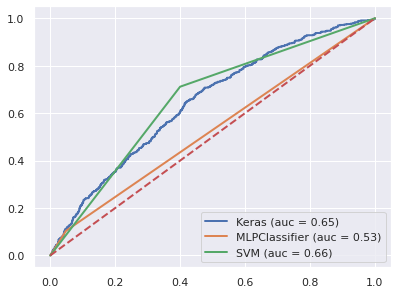

In [ ]:
# create ROC curves for the 3 models
from sklearn.metrics import roc_curve, auc
probs = {'Keras': keras_test_probs, 'MLPClassifier': mlpc_test_probs, 'SVM': svm_test_probs}
names = list(probs.keys())
fpr = {}
tpr = {}
roc_auc = {}
plt.figure(figsize=((6.4, 4.8)))
for i in range(len(probs)):
  fpr[i], tpr[i], _ = roc_curve(test_y, probs[names[i]])
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], lw=2, label='{} (auc = {:.2})'.format(names[i], roc_auc[i]))

plt.plot([0,1], [0,1], lw=2, linestyle='--')
plt.legend(loc='lower right')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

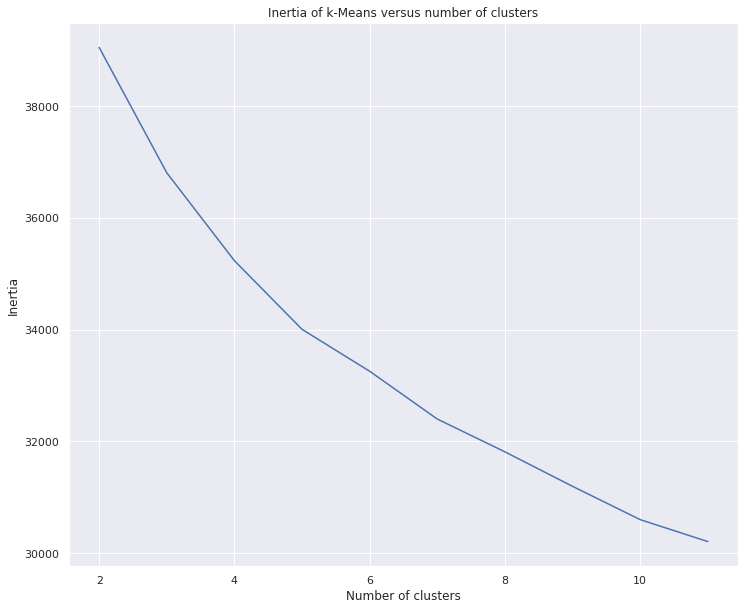

In [ ]:
# Experimenting with clustering. However, we chose to focus on classification instead
# k-Means clustering
# Using elbow method the determine the optimal k 
# https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb
# https://en.wikipedia.org/wiki/Elbow_method_(clustering)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

sns.set(rc={'figure.figsize':(12,10)})

scores = [KMeans(n_clusters=i+2).fit(df).inertia_ 
          for i in range(10)]

sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
from sklearn.metrics import silhouette_score
# Prepare models
kmeans = KMeans(n_clusters=4).fit(df)
print('kmeans: {}'.format(silhouette_score(df, kmeans.labels_, 
                                           metric='euclidean')))

kmeans: 0.09963442209052588


In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import MiniBatchKMeans

def kmeans_benchmark(model, name, features, labels):
  # measure time of model training
  t_begin = time()
  model.fit(features)
  dt = time() - t_begin

  # compute desired performance metrics for model
  homogeneity = metrics.homogeneity_score(labels, model.labels_)
  completeness = metrics.completeness_score(labels, model.labels_)
  vmeasure = metrics.v_measure_score(labels, model.labels_)
  ari = metrics.adjusted_rand_score(labels, model.labels_)
  ami = metrics.adjusted_mutual_info_score(labels, model.labels_)
  silhouette = metrics.silhouette_score(
      features,
      model.labels_,
      metric='euclidean',
      sample_size=300
  )

  # display metric scores
  print('[{}] ({:.2f}s):'.format(name, dt))
  print('inertia:\t{}'.format(int(model.inertia_)))
  print('homogen:\t{:.5f}'.format(homogeneity))
  print('cmplete:\t{:.5f}'.format(completeness))
  print('vmeasure:\t{:.5f}'.format(vmeasure))
  print('ari:\t{:.5f}'.format(ari))
  print('ami:\t{:.5f}'.format(ami))
  print('silh:\t{:.5f}'.format(silhouette))
  print()

train, test = train_test_split(df, train_size=0.7, random_state=1)
train_X = train.drop('Revenue', axis=1)
train_y = train['Revenue']
test_X = test.drop('Revenue', axis=1)
test_y = test['Revenue']

n_samples, n_features = df.shape
n_classes = len(np.unique(train_y))

print('n_classes: {0}\t n_samples: {1}\t n_features: {2}'
      .format(n_classes, n_samples, n_features))
print('training_size: {0}'.format(len(train_X)))
print()

n_init = 10
max_iter = 1
batch_size = 512

kmeans_benchmark(MiniBatchKMeans(
    init='k-means++',
    n_clusters=n_classes,
    n_init=n_init,
    max_iter=max_iter,
    batch_size=batch_size,
    verbose=1
), name='k-means++', features=train_X, labels=train_y)

kmeans_benchmark(MiniBatchKMeans(
    init='random',
    n_clusters=n_classes,
    n_init=n_init,
    max_iter=max_iter,
    batch_size=batch_size,
    verbose=0
), name='random', features=train_X, labels=train_y)



n_classes: 2	 n_samples: 12330	 n_features: 63
training_size: 8631

Init 1/10 with method: k-means++
Inertia for init 1/10: 2637849492.272758
Init 2/10 with method: k-means++
Inertia for init 2/10: 2528136718.078486
Init 3/10 with method: k-means++
Inertia for init 3/10: 2751398173.579026
Init 4/10 with method: k-means++
Inertia for init 4/10: 2534909804.599333
Init 5/10 with method: k-means++
Inertia for init 5/10: 2815732403.024913
Init 6/10 with method: k-means++
Inertia for init 6/10: 2473186983.579750
Init 7/10 with method: k-means++
Inertia for init 7/10: 2463170713.668100
Init 8/10 with method: k-means++
Inertia for init 8/10: 2864251779.599793
Init 9/10 with method: k-means++
Inertia for init 9/10: 2685861473.612859
Init 10/10 with method: k-means++
Inertia for init 10/10: 2463170713.668100
Minibatch iteration 1/17: mean batch inertia: 1166686.184211, ewa inertia: 1166686.184211 
Minibatch iteration 2/17: mean batch inertia: 1137668.881889, ewa inertia: 1163243.909237 
Minibatc

In [ ]:
# look at balanced_accuracy score for MLPClassifier
from sklearn.metrics import balanced_accuracy_score
preds = train_eval_sklearn_mlp(create_sklearn_MLP(hidden_layer_sizes=(24, 8), activation='tanh', solver='adam', 
                                          learning_rate_init=0.005, max_iter=300), train_X, train_y, test_X, test_y)
print('Preds Support: {}'.format(np.unique(preds, return_counts=True)))

Train Precision = 0.8405438813349815
Train Recall = 0.5492730210016155
Train Precision = 0.2492753623188406
Train Recall = 0.16443594646271512
Training Time: 13.44s
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2992
           1       0.25      0.16      0.20       523

    accuracy                           0.80      3515
   macro avg       0.56      0.54      0.54      3515
weighted avg       0.77      0.80      0.78      3515

Preds Support: (array([0, 1]), array([3170,  345]))


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# create function for keras cross-validation
from sklearn.model_selection import StratifiedKFold
def keras_cross_valdidation(model, X, y):
  # get cross validation scores for keras sequential model
  # Args:
  #  - model: keras model to be used
  #  - X: dataframe of dependent attributes of the dataset
  #  - y: dataframe of class attribute of the dataset
  KFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
  cv_scores = []

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='mean_squared_error', 
                  metrics=['accuracy'])
  for train, test in KFold.split(X, y):
    model.fit(X.loc[train], y.loc[train], batch_size=32, epochs=300)
    
    # Evaluate model and append metric scores
    scores = model.evaluate(X.loc[test], y.loc[test])
    cv_scores.append(scores[1] * 100)

  # Print results for each fold of the metric
  print ('\n', model.metrics_names[1])
  for index, score in enumerate(cv_scores):
    print ('fold', index, ':', score)
  print ('mean:', np.mean(cv_scores), 'std:', np.std(cv_scores))

In [ ]:
keras_cross_valdidation(create_keras_mlp(train_X, train_y), df.drop('Revenue', axis=1), df['Revenue'])

Epoch 1/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 0.8508
Epoch 2/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.8507
Epoch 3/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.8508
Epoch 4/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1177 - accuracy: 0.8508
Epoch 5/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.8508
Epoch 6/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.8508
Epoch 7/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1168 - accuracy: 0.8508
Epoch 8/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.8508
Epoch 9/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.8508
Epoch 10/300
293/293 [==============================] - 0s 1ms/step - loss: 0.1167 - accura

In [ ]:
# grid search for MLPClassifier
def gd_mlpc(model, train_X, train_y):
  # perform gridsearch for batch size, epochs, and learning rate for the MLPClassifer model
  # Args:
  #  - model: MLPClassifier to use for gridsearch
  #  - train_X: dataframe of training set with dependent attruibutes
  #  - train_y: dataframe of training set with class attribute only
  param_grid = dict(hidden_layer_sizes=[(24, 8), (20, 5), (20), (10)], 
    activation=('logistic', 'tanh', 'relu'), learning_rate_init=[0.005, 0.001, 0.05], 
    max_iter=[300, 500, 800])
  grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
  grid_result = grid.fit(train_X, train_y)
  
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
gd_mlpc(create_sklearn_MLP(), train_X, train_y)

Best: 0.849128 using {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.001, 'max_iter': 800}
0.800220 (0.001866) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.005, 'max_iter': 300}
0.793024 (0.004764) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.005, 'max_iter': 500}
0.796561 (0.005402) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.005, 'max_iter': 800}
0.848640 (0.000622) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.001, 'max_iter': 300}
0.848762 (0.000456) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.001, 'max_iter': 500}
0.849128 (0.000172) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.001, 'max_iter': 800}
0.797780 (0.007584) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_r

In [ ]:
# updated grid search with balanced_accuracy metric
def gd_mlpc(model, train_X, train_y):
  # perform gridsearch for batch size, epochs, and learning rate for the MLPClassifer model
  # Args:
  #  - model: MLPClassifier to use for gridsearch
  #  - train_X: dataframe of training set with dependent attruibutes
  #  - train_y: dataframe of training set with class attribute only
  param_grid = dict(hidden_layer_sizes=[(24, 8), (10, 5), (20), (10)], 
    activation=('logistic', 'tanh', 'relu'), learning_rate_init=[0.005, 0.001, 0.05], 
    max_iter=[300, 500, 800])
  grid_search(model, param_grid, train_X, train_y)

def grid_search(model, param_grid, train_X, train_y):
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='balanced_accuracy', n_jobs=-1, cv=3)
  grid_result = grid.fit(train_X, train_y)
  
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))
  return grid_result

In [ ]:
res = gd_mlpc(MLPClassifier(), train_X, train_y)

Best: 0.551629 using {'activation': 'tanh', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.005, 'max_iter': 300}
0.539130 (0.011106) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.005, 'max_iter': 300}
0.534245 (0.008407) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.005, 'max_iter': 500}
0.538027 (0.003685) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.005, 'max_iter': 800}
0.499785 (0.000176) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.001, 'max_iter': 300}
0.500000 (0.000000) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.001, 'max_iter': 500}
0.508335 (0.011940) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_init': 0.001, 'max_iter': 800}
0.531382 (0.005630) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 8), 'learning_rate_

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
def gd_svm(model, train_X, train_y):
  # perform gridsearch for batch size, epochs, and learning rate for the SVM model
  # Args:
  #  - model: MLPClassifier to use for gridsearch
  #  - train_X: dataframe of training set with dependent attruibutes
  #  - train_y: dataframe of training set with class attribute only
  param_grid = dict(kernel=('linear', 'poly', 'rbf', 'sigmoid'), 
    class_weight=(None, 'balanced'), gamma=('scale', 'auto', 1.2, 0.8))
  grid_search(model, param_grid, train_X, train_y)

def grid_search(model, param_grid, train_X, train_y):
  # perform gridsearch on the given model with specfied paramters
  # prints the scores of each of the models using each of the  different combinations 
  # of parameters, and the best parameters and score of all the models tried.
  # Args:
  #  - model: model to use for gridsearch
  #  - param_grid: dict that specifies the grid of parameters to use 
  #  - train_X: dataframe of training set with dependent attruibutes
  #  - train_y: dataframe of training set with class attribute only
  # Returns:
  #  - grid_result: results of gridsearch
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='balanced_accuracy', 
    n_jobs=-1, cv=3)
  grid_result = grid.fit(train_X, train_y)
  
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))
  return grid_result

In [ ]:
res = gd_svm(SVC(), train_X, train_y)

Best: 0.657169 using {'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.500000 (0.000000) with: {'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
0.500855 (0.001364) with: {'class_weight': None, 'gamma': 'scale', 'kernel': 'poly'}
0.500000 (0.000000) with: {'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
0.537132 (0.010451) with: {'class_weight': None, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.500000 (0.000000) with: {'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
0.500000 (0.000000) with: {'class_weight': None, 'gamma': 'auto', 'kernel': 'poly'}
0.500000 (0.000000) with: {'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
0.500000 (0.000000) with: {'class_weight': None, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.500000 (0.000000) with: {'class_weight': None, 'gamma': 1.2, 'kernel': 'linear'}
0.531921 (0.001981) with: {'class_weight': None, 'gamma': 1.2, 'kernel': 'poly'}
0.511236 (0.004102) with: {'class_weight': None, 'gamma': 1.2, '

In [ ]:
preds = train_eval_svm(create_svm('linear', 'balanced', 'scale'), train_X, train_y, test_X, test_y)

Train Precision = 0.25815766676292234
Train Recall = 0.7327868852459016
Train Precision = 0.24755244755244754
Train Recall = 0.6768642447418738
Training Time: 5.68s
              precision    recall  f1-score   support

           0       0.92      0.64      0.75      2991
           1       0.25      0.68      0.36       523

    accuracy                           0.65      3514
   macro avg       0.58      0.66      0.56      3514
weighted avg       0.82      0.65      0.70      3514



In [ ]:
from sklearn.metrics import f1_score
f1_score(test_y, preds, average='weighted')

0.696313270598491

In [ ]:
precision_score(test_y, preds, average='weighted')

0.8189862341511025

In [ ]:
# create keras model helper function for grid search
def create_keras_mlp(learn_rate=None, input_dim=None):
  model = keras.Sequential([layers.Dense(32, activation='sigmoid', input_dim=input_dim),
                            layers.Dense(12, activation='sigmoid'),
                            layers.Dense(1, activation='sigmoid')])
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learn_rate), loss='mean_squared_error', metrics=['accuracy'])
  return model

In [ ]:
def gd_keras_mlp(model, train_X, train_y):
  # perform gridsearch for batch size, epochs, and learning rate for the keras model
  # Args:
  #  - model: keras sequential model to use for gridsearch
  #  - train_X: dataframe of training set with dependent attruibutes
  #  - train_y: dataframe of training set with class attribute only
  param_grid = dict(batch_size=[100, 150, 200, 300], epochs=[150, 200, 250, 300], learn_rate=[0.001, 0.005, 0.01, 0.05])
  grid_search(model, param_grid, train_X, train_y)

model = KerasClassifier(build_fn=create_keras_mlp, input_dim=train_X.shape[1], verbose=0)
gd_keras_mlp(model, train_X, train_y)

Best: 0.554110 using {'batch_size': 150, 'epochs': 200, 'learn_rate': 0.05}
0.501254 (0.001825) with: {'batch_size': 100, 'epochs': 150, 'learn_rate': 0.001}
0.536221 (0.003437) with: {'batch_size': 100, 'epochs': 150, 'learn_rate': 0.005}
0.539990 (0.004703) with: {'batch_size': 100, 'epochs': 150, 'learn_rate': 0.01}
0.543966 (0.008204) with: {'batch_size': 100, 'epochs': 150, 'learn_rate': 0.05}
0.509556 (0.003283) with: {'batch_size': 100, 'epochs': 200, 'learn_rate': 0.001}
0.539400 (0.002894) with: {'batch_size': 100, 'epochs': 200, 'learn_rate': 0.005}
0.539694 (0.015888) with: {'batch_size': 100, 'epochs': 200, 'learn_rate': 0.01}
0.547975 (0.007373) with: {'batch_size': 100, 'epochs': 200, 'learn_rate': 0.05}
0.508879 (0.005650) with: {'batch_size': 100, 'epochs': 250, 'learn_rate': 0.001}
0.532801 (0.012661) with: {'batch_size': 100, 'epochs': 250, 'learn_rate': 0.005}
0.546308 (0.005520) with: {'batch_size': 100, 'epochs': 250, 'learn_rate': 0.01}
0.548890 (0.002893) with: {

In [ ]:
def create_keras_mlp(train_X, train_y, activation='sigmoid', learning_rate=0.005, loss='mean_squared_error'):
  # create and return an instance of keras sequential model with custom parameters
    # Args:
    #  - activation: activation function to use
    #  - learning_rate: value of learning rate to use
    #  - loss: loss function to use
    # see https://www.tensorflow.org/api_docs/python/tf/keras/Sequential for list of possible parameter options
  model = keras.Sequential([layers.Dense(32, activation=activation, input_dim=train_X.shape[1]),
                            layers.Dense(12, activation=activation),
                            layers.Dense(1, activation=activation)])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=loss, 
              metrics=['accuracy'])
  return model

def train_eval_keras_mlp(model, train_X, train_y, test_X, test_y, epochs=300, batch_size=32):
  # train and evaluate keras sequential model
  # prints out the precision and recall for train and test sets, classification report, and 
  # the training time of the model
  # Args:
  #  - model: keras sequential model to use
  #  - train_X: dataframe of training set with dependent attruibutes
  #  - train_y: dataframe of training set with class attribute only 
  #  - test_X: dataframe of test set with dependent attruibutes
  #  - test_y: dataframe of test set with class attribute only 
  # Returns:
  #  - keras_test_probs: list of the predictions of the model when run on test set
  keras_start_time = time()
  model_res = model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs)
  keras_train_time = time() - keras_start_time

  # evaluate model on train set and test set
  keras_train_probs = model.predict(train_X)
  keras_train_preds = [0 if keras_train_probs[i] < 0.5 else 1 for i in range(len(keras_train_probs))]
  print("\n")
  printModelScores(train_y, keras_train_preds)
  keras_test_probs = model.predict(test_X)
  keras_test_preds = [0 if keras_test_probs[i] < 0.5 else 1 for i in range(len(keras_test_probs))]
  printModelScores(test_y, keras_test_preds)
  print('Training Time: {:.2f}s'.format(keras_train_time))

  print(classification_report(test_y, keras_test_preds))
  # return model predictions for further use
  return keras_test_probs

train_eval_keras_mlp(create_keras_mlp(train_X, train_y, activation='sigmoid', learning_rate=0.05, loss='mean_squared_error'), train_X, train_y, test_X, test_y, 200, 150)

Epoch 1/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1233 - accuracy: 0.8549
Epoch 2/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1160 - accuracy: 0.8549
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.8549
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.8545
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1138 - accuracy: 0.8545
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1132 - accuracy: 0.8547
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.8551
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.8549
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1095 - accuracy: 0.8567
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.8568
Epoch 11/

array([[1.6026616e-02],
       [2.0188410e-05],
       [7.2438520e-01],
       ...,
       [1.9460022e-01],
       [2.6389897e-02],
       [6.2728536e-01]], dtype=float32)

In [ ]:
# results for keras model. average over 10 different trials
from sklearn.metrics import f1_score, accuracy_score
model = create_keras_mlp(train_X, train_y, activation='sigmoid', learning_rate=0.05, loss='mean_squared_error')
train_times = []
pred_times = []
scores = {'f1': [], 'precision': [], 'recall': [], 'accuracy': []}
for i in range(10):
  keras_start_time = time()
  model_res = model.fit(train_X, train_y, batch_size=150, epochs=200)
  train_times.append(time() - keras_start_time)
  keras_pred_start = time()
  keras_test_probs = model.predict(test_X)
  pred_times.append(time() - keras_pred_start)
  keras_test_preds = [0 if keras_test_probs[i] < 0.5 else 1 for i in range(len(keras_test_probs))]
  scores['f1'].append(f1_score(test_y, keras_test_preds, average='weighted'))
  scores['precision'].append(precision_score(test_y, keras_test_preds, average='weighted'))
  scores['recall'].append(recall_score(test_y, keras_test_preds, average='weighted'))
  scores['accuracy'].append(accuracy_score(test_y, keras_test_preds))

print("Precision: {} \nRecall: {} \nF1: {} \nAccuracy: {}".format(sum(scores['precision'])/len(scores['precision']), 
                                                                  sum(scores['recall'])/len(scores['recall']), 
                                                                  sum(scores['f1'])/len(scores['f1']), 
                                                                  sum(scores['accuracy'])/len(scores['accuracy'])))



Epoch 1/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.8512
Epoch 2/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1187 - accuracy: 0.8512
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1177 - accuracy: 0.8512
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.8512
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.8507
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.8511
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.8514
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1132 - accuracy: 0.8516
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.8536
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.8529
Epoch 11/

In [ ]:
sum(train_times)/len(train_times)

21.081999087333678

In [ ]:
sum(pred_times)/len(pred_times)

0.19329755306243895

In [ ]:
# get averaged results for sklearn MLPClassifier and svm
def get_averaged_results(model, num_times):
  train, test = train_test_split(df, train_size=0.7, random_state=1)
  train_X = train.drop('Revenue', axis=1)
  train_y = train['Revenue']
  test_X = test.drop('Revenue', axis=1)
  test_y = test['Revenue']
  for i in range(num_times):
    train_start = time()
    model_res = model.fit(train_X, train_y)
    train_times.append(time() - train_start)
    pred_start = time()
    test_probs = model.predict(test_X)
    pred_times.append(time() - pred_start)
    test_preds = [0 if test_probs[i] < 0.5 else 1 for i in range(len(test_probs))]
    scores['f1'].append(f1_score(test_y, test_preds, average='weighted'))
    scores['precision'].append(precision_score(test_y, test_preds, average='weighted'))
    scores['recall'].append(recall_score(test_y, test_preds, average='weighted'))
    scores['accuracy'].append(accuracy_score(test_y, test_preds))

  print("Precision: {} \nRecall: {} \nF1: {} \nAccuracy: {}".format(sum(scores['precision'])/len(scores['precision']), 
                                                                    sum(scores['recall'])/len(scores['recall']), 
                                                                  sum(scores['f1'])/len(scores['f1']), 
                                                                  sum(scores['accuracy'])/len(scores['accuracy'])))
  print("Train time: {} \nPrediction time: {}".format(sum(train_times)/len(train_times), sum(pred_times)/len(pred_times)))

train_times = []
pred_times = []
scores = {'f1': [], 'precision': [], 'recall': [], 'accuracy': []}
mlpc = create_sklearn_MLP(activation='tanh')
get_averaged_results(mlpc, 10)
print("\n")
train_times = []
pred_times = []
scores = {'f1': [], 'precision': [], 'recall': [], 'accuracy': []}
svm = create_svm(class_weight='balanced', gamma='scale', kernel='linear')
get_averaged_results(svm, 10)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Precision: 0.7690541500558756 
Recall: 0.7964997154240182 
F1: 0.7812658089911667 
Accuracy: 0.7964997154240182
Train time: 14.523215794563294 
Prediction time: 0.00912473201751709


Precision: 0.8189862341511025 
Recall: 0.6457029026750141 
F1: 0.696313270598491 
Accuracy: 0.6457029026750141
Train time: 5.567787623405456 
Prediction time: 1.4234635829925537


In [ ]:
# get averaged results but with undersampled train set
def get_averaged_results(model, num_times):
  train, test = train_test_split(df, train_size=0.7, random_state=1)
  train_X = train.drop('Revenue', axis=1)
  train_y = train['Revenue']
  test_X = test.drop('Revenue', axis=1)
  test_y = test['Revenue']
  train_X_under, train_y_under = getUnderSampled(train_X, train_y)
  for i in range(num_times):
    train_start = time()
    model_res = model.fit(train_X_under, train_y_under)
    train_times.append(time() - train_start)
    pred_start = time()
    test_probs = model.predict(test_X)
    pred_times.append(time() - pred_start)
    test_preds = [0 if test_probs[i] < 0.5 else 1 for i in range(len(test_probs))]
    scores['f1'].append(f1_score(test_y, test_preds, average='weighted'))
    scores['precision'].append(precision_score(test_y, test_preds, average='weighted'))
    scores['recall'].append(recall_score(test_y, test_preds, average='weighted'))
    scores['accuracy'].append(accuracy_score(test_y, test_preds))

  print("Precision: {} \nRecall: {} \nF1: {} \nAccuracy: {}".format(sum(scores['precision'])/len(scores['precision']), 
                                                                    sum(scores['recall'])/len(scores['recall']), 
                                                                  sum(scores['f1'])/len(scores['f1']), 
                                                                  sum(scores['accuracy'])/len(scores['accuracy'])))
  print("Train time: {} \nPrediction time: {}".format(sum(train_times)/len(train_times), sum(pred_times)/len(pred_times)))

train_times = []
pred_times = []
scores = {'f1': [], 'precision': [], 'recall': [], 'accuracy': []}
mlpc = create_sklearn_MLP(activation='tanh')
get_averaged_results(mlpc, 10)
print("\n")
train_times = []
pred_times = []
scores = {'f1': [], 'precision': [], 'recall': [], 'accuracy': []}
svm = create_svm(class_weight='balanced', gamma='scale', kernel='linear')
get_averaged_results(svm, 10)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

Precision: 0.7965129583430226 
Recall: 0.6000284575981786 
F1: 0.6575062556921885 
Accuracy: 0.6000284575981786
Train time: 4.497996497154236 
Prediction time: 0.009255623817443848


Precision: 0.807036336247483 
Recall: 0.6627774615822426 
F1: 0.7092775083052071 
Accuracy: 0.6627774615822426
Train time: 0.44498703479766843 
Prediction time: 0.4267299652099609


In [ ]:
# get averaged results with oversampled train set
def get_averaged_results(model, num_times):
  train, test = train_test_split(df, train_size=0.7, random_state=1)
  train_X = train.drop('Revenue', axis=1)
  train_y = train['Revenue']
  test_X = test.drop('Revenue', axis=1)
  test_y = test['Revenue']
  train_X_over, train_y_over = getOverSampled(train_X, train_y)
  for i in range(num_times):
    train_start = time()
    model_res = model.fit(train_X_over, train_y_over)
    train_times.append(time() - train_start)
    pred_start = time()
    test_probs = model.predict(test_X)
    pred_times.append(time() - pred_start)
    test_preds = [0 if test_probs[i] < 0.5 else 1 for i in range(len(test_probs))]
    scores['f1'].append(f1_score(test_y, test_preds, average='weighted'))
    scores['precision'].append(precision_score(test_y, test_preds, average='weighted'))
    scores['recall'].append(recall_score(test_y, test_preds, average='weighted'))
    scores['accuracy'].append(accuracy_score(test_y, test_preds))

  print("Precision: {} \nRecall: {} \nF1: {} \nAccuracy: {}".format(sum(scores['precision'])/len(scores['precision']), 
                                                                    sum(scores['recall'])/len(scores['recall']), 
                                                                  sum(scores['f1'])/len(scores['f1']), 
                                                                  sum(scores['accuracy'])/len(scores['accuracy'])))
  print("Train time: {} \nPrediction time: {}".format(sum(train_times)/len(train_times), sum(pred_times)/len(pred_times)))

train_times = []
pred_times = []
scores = {'f1': [], 'precision': [], 'recall': [], 'accuracy': []}
mlpc = create_sklearn_MLP(activation='tanh')
get_averaged_results(mlpc, 10)
print("\n")
train_times = []
pred_times = []
scores = {'f1': [], 'precision': [], 'recall': [], 'accuracy': []}
svm = create_svm(class_weight='balanced', gamma='scale', kernel='linear')
get_averaged_results(svm, 10)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

Precision: 0.7802577403339603 
Recall: 0.7101878201479795 
F1: 0.7386592416629265 
Accuracy: 0.7101878201479795
Train time: 24.26800744533539 
Prediction time: 0.009362626075744628


Precision: 0.821363917252554 
Recall: 0.6457029026750141 
F1: 0.6963977758985688 
Accuracy: 0.6457029026750141
Train time: 15.957242465019226 
Prediction time: 2.4163176298141478


In [ ]:
# get averaged results for keras model with undersampled train set
model = create_keras_mlp(train_X, train_y, activation='sigmoid', learning_rate=0.05, loss='mean_squared_error')
train_times = []
pred_times = []
scores = {'f1': [], 'precision': [], 'recall': [], 'accuracy': []}
for i in range(10):
  train, test = train_test_split(df, train_size=0.7, random_state=1)
  train_X = train.drop('Revenue', axis=1)
  train_y = train['Revenue']
  test_X = test.drop('Revenue', axis=1)
  test_y = test['Revenue']
  train_X_under, train_y_under = getUnderSampled(train_X, train_y)
  keras_start_time = time()
  model_res = model.fit(train_X, train_y, batch_size=150, epochs=200)
  train_times.append(time() - keras_start_time)
  keras_pred_start = time()
  keras_test_probs = model.predict(test_X)
  pred_times.append(time() - keras_pred_start)
  keras_test_preds = [0 if keras_test_probs[i] < 0.5 else 1 for i in range(len(keras_test_probs))]
  scores['f1'].append(f1_score(test_y, keras_test_preds, average='weighted'))
  scores['precision'].append(precision_score(test_y, keras_test_preds, average='weighted'))
  scores['recall'].append(recall_score(test_y, keras_test_preds, average='weighted'))
  scores['accuracy'].append(accuracy_score(test_y, keras_test_preds))

print("Precision: {} \nRecall: {} \nF1: {} \nAccuracy: {}".format(sum(scores['precision'])/len(scores['precision']), 
                                                                  sum(scores['recall'])/len(scores['recall']), 
                                                                  sum(scores['f1'])/len(scores['f1']), 
                                                                  sum(scores['accuracy'])/len(scores['accuracy'])))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1324 - accuracy: 0.8512
Epoch 2/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.8512
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.8512
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.8512
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.8512
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.8512
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.8512
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.8512
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.8505
Epoch 10/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1150 - accuracy: 0.8519
Epoch 11/

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0588 - accuracy: 0.9239
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0598 - accuracy: 0.9244
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9205
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.9207
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0595 - accuracy: 0.9217
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.9232
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0599 - accuracy: 0.9213
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 0.9263
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0599 - accuracy: 0.9210
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.9246
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9322
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9316
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9313
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9349
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9324
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9328
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9310
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9310
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9323
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9291
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9367
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9367
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9351
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9345
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9316
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9312
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9313
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9308
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.9322
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9344
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9319
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9355
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.9343
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0487 - accuracy: 0.9349
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.9363
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9356
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0468 - accuracy: 0.9367
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9360
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0457 - accuracy: 0.9369
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.9357
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9406
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0457 - accuracy: 0.9390
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9379
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0457 - accuracy: 0.9369
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9372
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9363
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.9367
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9395
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9361
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9360
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.9377
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9387
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0438 - accuracy: 0.9407
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0441 - accuracy: 0.9415
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 0.9413
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.9430
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.9394
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.9393
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0463 - accuracy: 0.9355
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9368
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.9460
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9395
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9430
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9410
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 0.9421
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9406
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 0.9411
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.9400
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9416
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9441
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9434
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9472
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9449
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.9422
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9458
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 0.9443
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9466
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9467
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9477
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9429
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9438
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0455 - accuracy: 0.9408
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9467
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9472
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9473
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9458
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9435
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9467
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.9476
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9469
Epoch 12/200
55/55 [

In [ ]:
# get averaged results for keras model with oversampled train set
model = create_keras_mlp(train_X, train_y, activation='sigmoid', learning_rate=0.05, loss='mean_squared_error')
train_times = []
pred_times = []
scores = {'f1': [], 'precision': [], 'recall': [], 'accuracy': []}
for i in range(10):
  train, test = train_test_split(df, train_size=0.7, random_state=1)
  train_X = train.drop('Revenue', axis=1)
  train_y = train['Revenue']
  test_X = test.drop('Revenue', axis=1)
  test_y = test['Revenue']
  train_X_over, train_y_over = getOverSampled(train_X, train_y)
  keras_start_time = time()
  model_res = model.fit(train_X, train_y, batch_size=150, epochs=200)
  train_times.append(time() - keras_start_time)
  keras_pred_start = time()
  keras_test_probs = model.predict(test_X)
  pred_times.append(time() - keras_pred_start)
  keras_test_preds = [0 if keras_test_probs[i] < 0.5 else 1 for i in range(len(keras_test_probs))]
  scores['f1'].append(f1_score(test_y, keras_test_preds, average='weighted'))
  scores['precision'].append(precision_score(test_y, keras_test_preds, average='weighted'))
  scores['recall'].append(recall_score(test_y, keras_test_preds, average='weighted'))
  scores['accuracy'].append(accuracy_score(test_y, keras_test_preds))

print("Precision: {} \nRecall: {} \nF1: {} \nAccuracy: {}".format(sum(scores['precision'])/len(scores['precision']), 
                                                                  sum(scores['recall'])/len(scores['recall']), 
                                                                  sum(scores['f1'])/len(scores['f1']), 
                                                                  sum(scores['accuracy'])/len(scores['accuracy'])))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1358 - accuracy: 0.8307
Epoch 2/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.8512
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.8512
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.8512
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.8512
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.8512
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.8512
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.8512
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.8512
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.8512
Epoch 11/

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9194
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9172
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9165
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9193
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9180
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0621 - accuracy: 0.9228
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9228
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9222
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9197
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9182
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9260
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9265
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9277
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9263
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9249
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0604 - accuracy: 0.9216
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0605 - accuracy: 0.9219
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0592 - accuracy: 0.9236
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9263
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9250
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9307
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9282
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9295
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9278
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9282
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9282
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9271
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9272
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9286
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9274
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9296
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9296
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9300
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9283
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9302
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9282
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9278
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9300
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9305
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 0.9257
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9294
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9277
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9284
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9273
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9267
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9260
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9283
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9271
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9294
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9280
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0484 - accuracy: 0.9334
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9291
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9280
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.9308
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.9330
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9312
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9300
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9305
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9322
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9294
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9302
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9308
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9327
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9321
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.9330
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9321
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.9333
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.9324
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9339
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9326
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.9311
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9316
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.9312
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9305
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9297
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9294
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9284
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9317
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0487 - accuracy: 0.9330
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9340
Epoch 12/200
55/55 [

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


55/55 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9318
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9332
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.9345
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.9339
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9293
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9285
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9324
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9341
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0487 - accuracy: 0.9333
Epoch 11/200
55/55 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9333
Epoch 12/200
55/55 [

Epoch 1/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1364 - accuracy: 0.8392
Epoch 2/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.8512
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.8512
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.8512
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.8512
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.8512
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.8512
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1267 - accuracy: 0.8512
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1208 - accuracy: 0.8512
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.8512
Epoch 11/

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train Precision = 0.8080536912751678
Train Recall = 0.4934426229508197
Train Precision = 0.22549019607843138
Train Recall = 0.13193116634799235
Training Time: 14.66s
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2991
           1       0.23      0.13      0.17       523

    accuracy                           0.80      3514
   macro avg       0.54      0.53      0.53      3514
weighted avg       0.76      0.80      0.78      3514

Train Precision = 0.25815766676292234
Train Recall = 0.7327868852459016
Train Precision = 0.24755244755244754
Train Recall = 0.6768642447418738
Training Time: 5.68s
              precision    recall  f1-score   support

           0       0.92      0.64      0.75      2991
           1       0.25      0.68      0.36       523

    accuracy                           0.65      3514
   macro avg       0.58      0.66      0.56      3514
weighted avg       0.82      0.65      0.70      3514



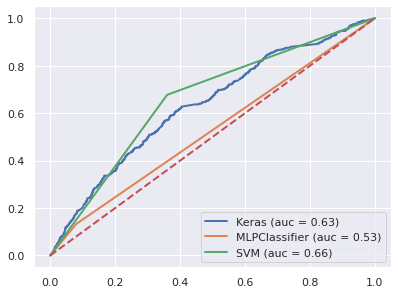

In [ ]:
# create new roc_curve from model predictions with hyperparameters found from grid search
from sklearn.metrics import roc_curve, auc
keras_model = create_keras_mlp(train_X, train_y, activation='sigmoid', learning_rate=0.05, loss='mean_squared_error')
keras_model.fit(train_X, train_y, batch_size=150, epochs=200)
keras_test_probs = model.predict(test_X)

mlpc_test_probs = train_eval_sklearn_mlp(create_sklearn_MLP(activation='tanh'), train_X, train_y, test_X, test_y)
svm_test_probs = train_eval_svm(create_svm(class_weight='balanced', gamma='scale', kernel='linear'), train_X, train_y, test_X, test_y)
probs = {'Keras': keras_test_probs, 'MLPClassifier': mlpc_test_probs, 'SVM': svm_test_probs}
names = list(probs.keys())
fpr = {}
tpr = {}
roc_auc = {}
plt.figure(figsize=((6.4, 4.8)))
for i in range(len(probs)):
  fpr[i], tpr[i], _ = roc_curve(test_y, probs[names[i]])
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], lw=2, label='{} (auc = {:.2})'.format(names[i], roc_auc[i]))

plt.plot([0,1], [0,1], lw=2, linestyle='--')
plt.legend(loc='lower right')